In [2]:
# 3장 비지도 학습과 데이터 전처리 - 차원 축소, 특성 추출, 매니폴드 학습

# 주성분 분석!

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [4]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))


원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '2nd pc')

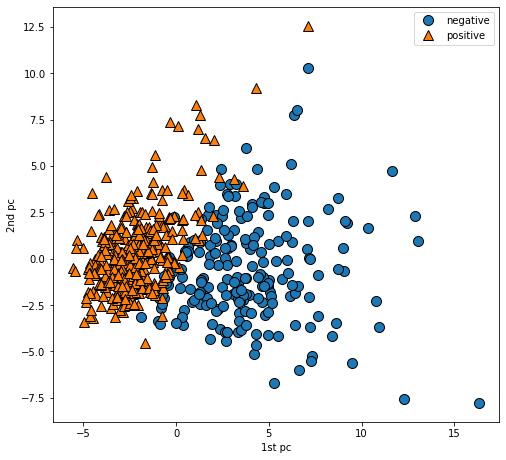

In [17]:
import matplotlib.pyplot as plt
import mglearn
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["negative", "positive"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st pc")
plt.ylabel("2nd pc")

In [6]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


In [7]:
print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'pc')

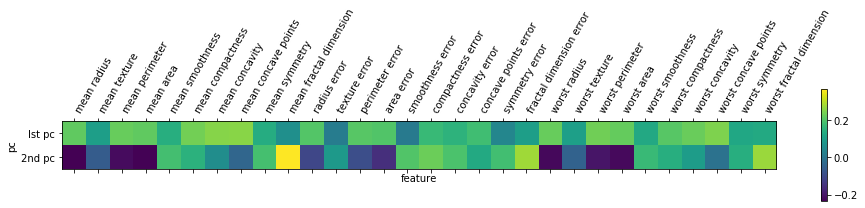

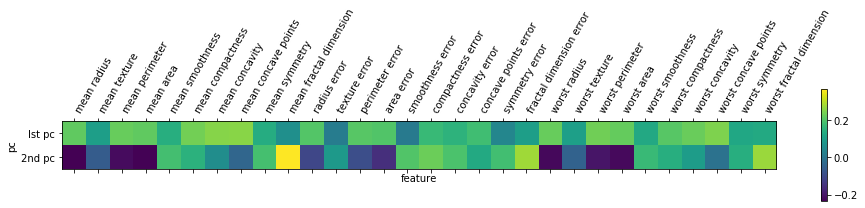

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["lst pc", "2nd pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("pc")
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["lst pc", "2nd pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("pc")

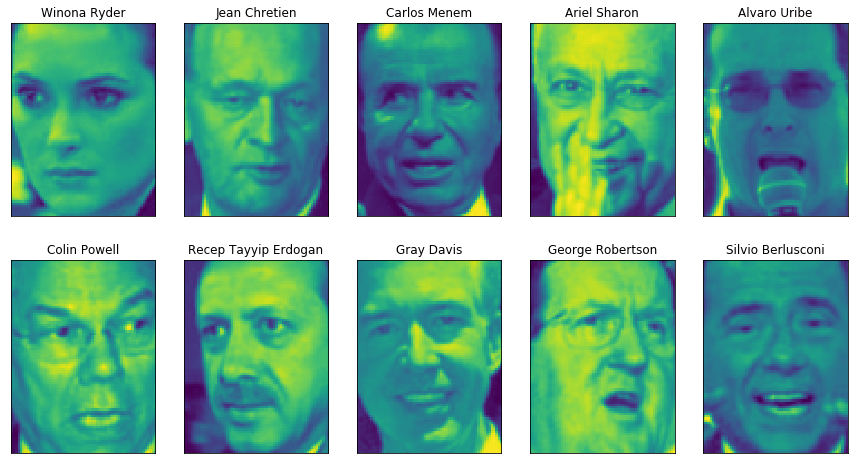

In [9]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize= 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

plt.show()

In [10]:
import numpy as np
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target== target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("{:2f}".format(knn.score(X_test, y_test)))

0.232558


In [12]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [13]:
# 이제 100개의 주성분에 해당하는 특성을 가집니다. 이제 이 데이터를 사용해 1-최근접 이웃 분류기로 이미지를 분류해보겠습니다.

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("{:.2f}".format(knn.score(X_test_pca, y_test)))

0.31


In [15]:
# 그래도 정확도가 31%로 향상되었습니다. 

# 이를 통해 주성분이 이 데이터에서는 더 잘 표현한다고 판단할 수 있습니다. 이미지 데이터에는 계산한 주성분을 쉽게 시각화할 수 있습니다. 
# 몇 개의 주성분을 확인해보겠습니다. 
# 이렇게 얼굴 이미지에서 구한 주성분을 다시 이미지로 나타낸 것을 특별히 고유얼굴(eigenface) 라고 합니다.

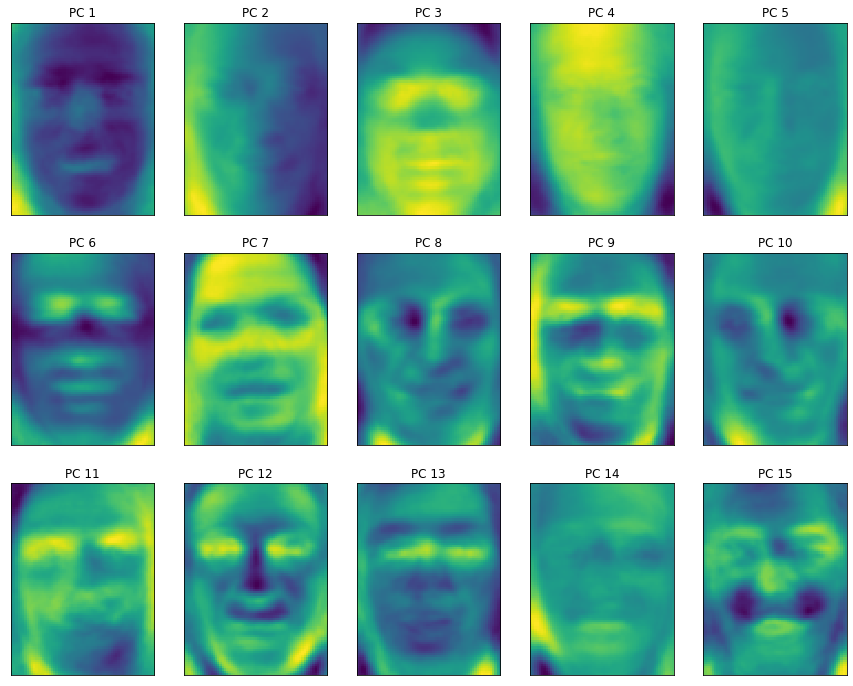

In [16]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("PC {}".format(i+1))

# 비음수 행렬 분해 NMF
## nor-negative factorization

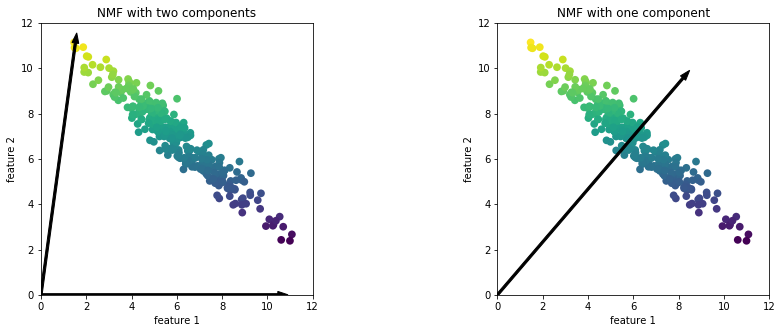

In [19]:
mglearn.plots.plot_nmf_illustration()

In [20]:
## 얼굴 이미지에 NMF적용하기

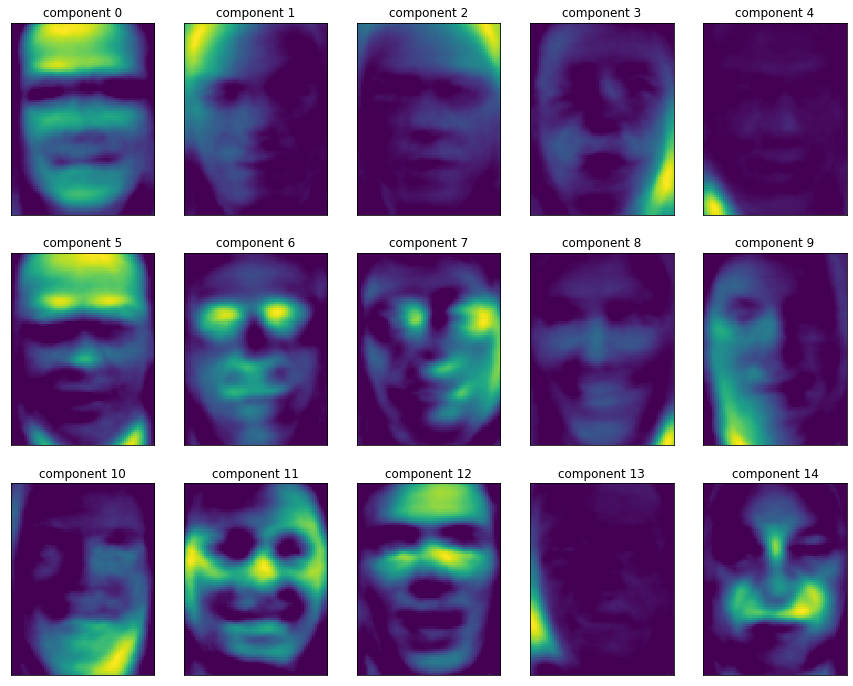

In [21]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("component {}".format(i))

In [22]:
# 이 성분들은 모두 양수 값이어서 PCA 성분보다 훨씬 더 얼굴 원형처럼 보입니다. 이 성분들이 특별히 강하게 나타난 이미지들을 살펴보겠습니다.

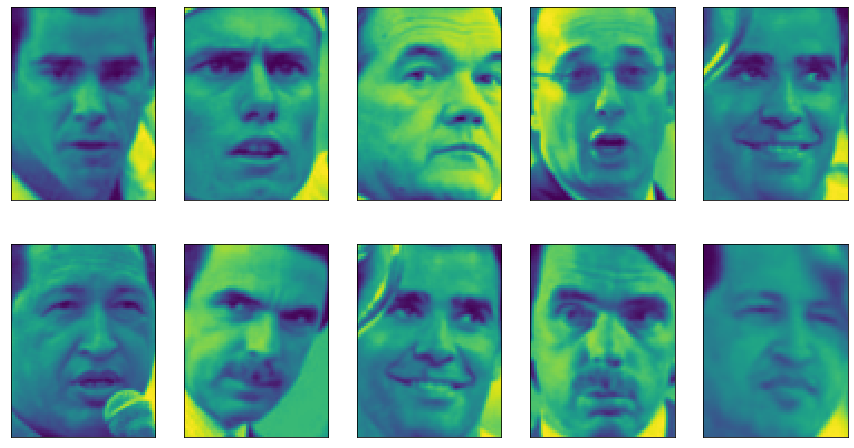

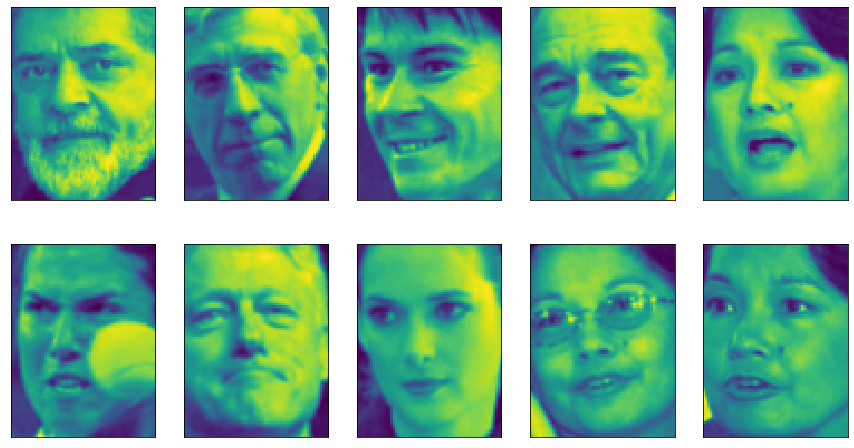

In [23]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [24]:
# 3의 경우에는 오른쪽을 보는 경향이 있고, 7의 경우에는 왼쪽을 보는 경향이 있습니다. 이와 같은 패턴을 추출하는 것은 소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합합니다. 인위적인 데이터셋을 사용한 예를 통해서 이에 관해 자세히 살펴보겠습니다.

In [25]:
# 다음은 세 개의 서로 다른 입력으로부터 합성된 신호입니다.

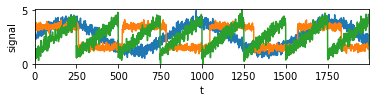

In [26]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("t")
plt.ylabel("signal")
plt.margins(0)

In [27]:
# 원본신호는 다음과 같지만 우리는 원본 신호가 아닌 합쳐진 신호만 관찰할 수 있는 상황입니다. 이 신호를 분해하여 원본 신호를 복원해야 합니다. 이 신호를 여러 방법(100개의 장치)으로 관찰할 수 있고, 각 장치는 일련의 측정 데이터를 제공한다고 가정합니다.

In [28]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

측정 데이터 형태: (2000, 100)


In [33]:
# NMF를 사용해 세 개의 신호를 복원합니다.
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))
pca = PCA(n_components=3)
H = pca.fit_transform(X)

복원한 신호 데이터 형태: (2000, 3)


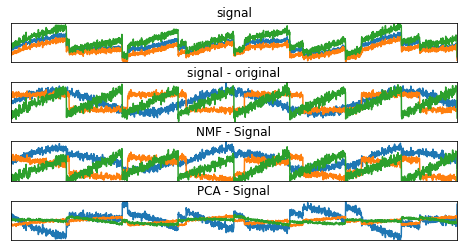

In [34]:
models = [X, S, S_, H]
names = ['signal',
         'signal - original',
         'NMF - Signal',
         'PCA - Signal']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)


# t-SNE를 이용한 매니폴드 학습

## manifold learning 알고리즘이란?

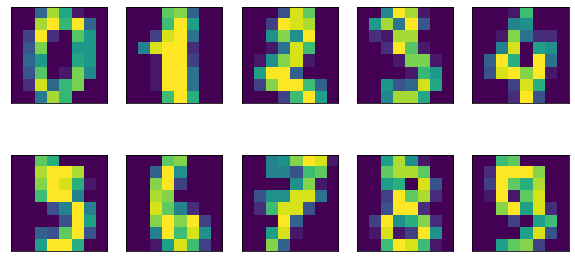

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [37]:
# 샘플 이미지 자체도 픽셀 수가 적다보니 구분하기 어렵게 생겼습니다. PCA를 사용해 2차원으로 축소해 시각화하겠습니다. 두 개의 주성분을 이용해 그래프를 그리고 각 샘플에 해당하는 클래스는 숫자로 표현하겠습니다.

Text(0, 0.5, '2st PC')

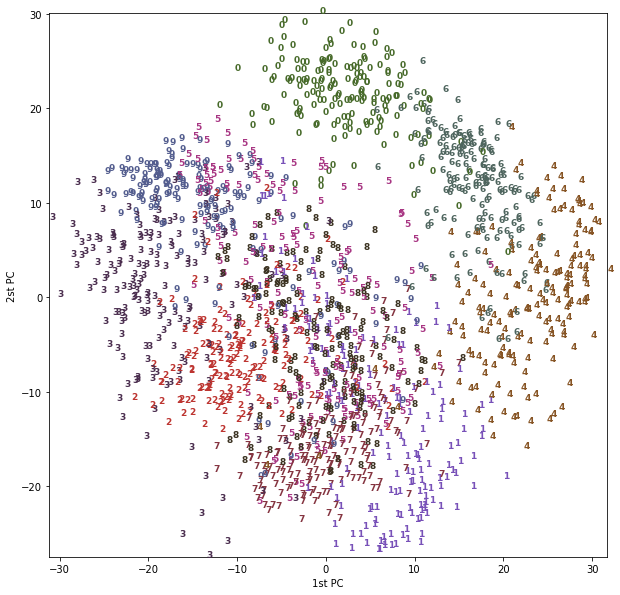

In [38]:
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("1st PC")
plt.ylabel("2st PC")